In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()



In [3]:
imgs = olivetti.images
labels = olivetti.target

# Reshape the images from (400, 64, 64) to (400, 4096) and then transpose to (4096, 400)
X = imgs.reshape((400, 4096)).transpose()
X.shape

(4096, 400)

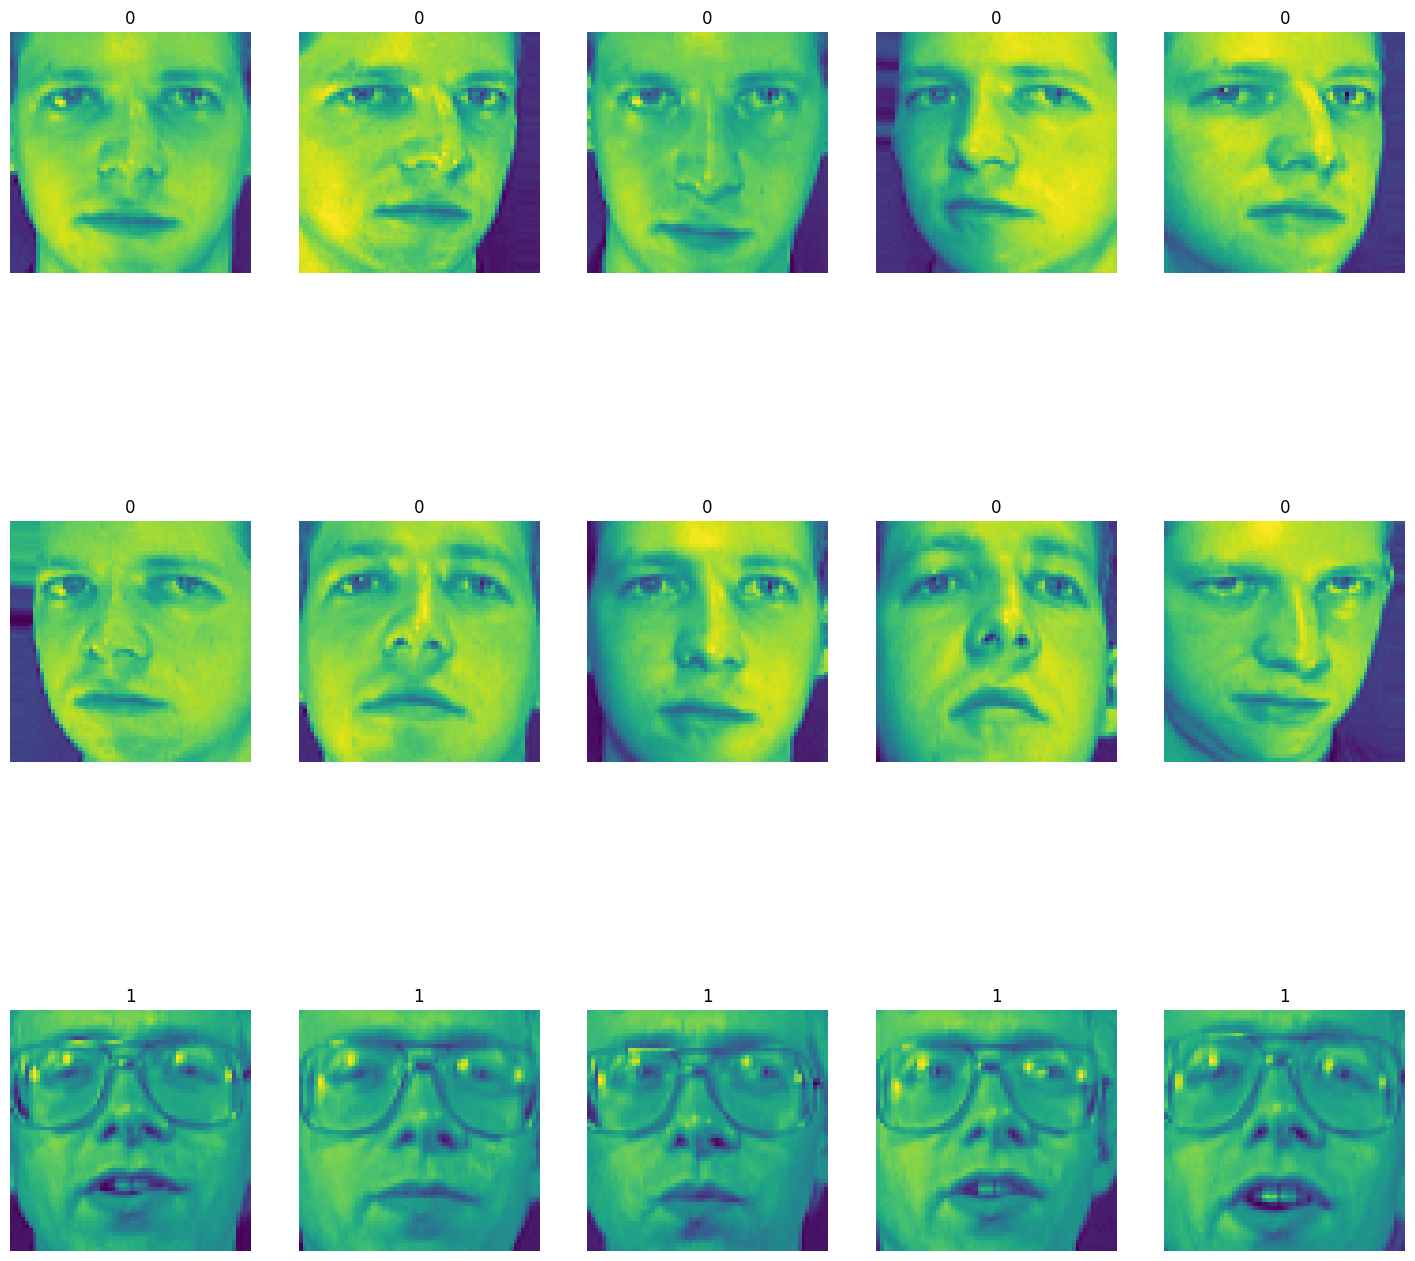

In [4]:

fig, axs = plt.subplots(3,5, figsize=(18,18))
axs = axs.flatten()

for i in range(15):
    axs[i].imshow(imgs[i])
    axs[i].set_title(labels[i])
    axs[i].axis('off')

1. Visualize 10 randomly selected pictures with the corresponding labels.


In [5]:
img = np.reshape(X[:,0], (64,64))
img.shape

(64, 64)

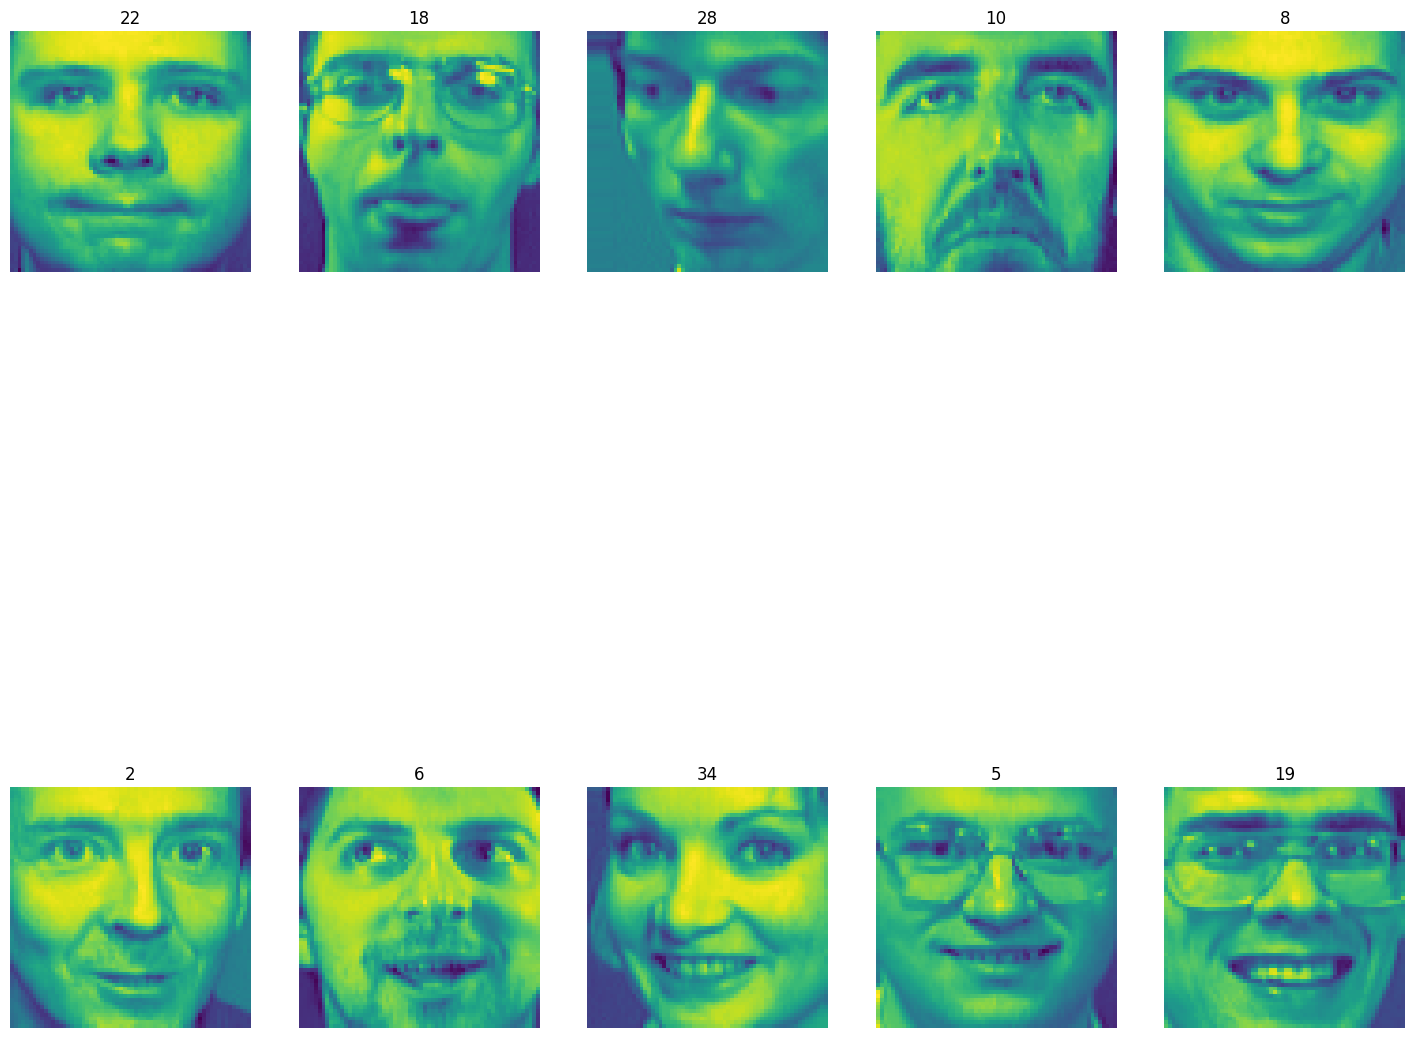

In [6]:

fig, axs = plt.subplots(2,5, figsize=(18,18))
axs = axs.flatten()

for i in range(10):
    randomIndex = np.random.randint(0,399)
    img = np.reshape(X[:,randomIndex], (64,64))
    axs[i].imshow(img)
    axs[i].set_title(labels[randomIndex])
    axs[i].axis('off')

2. Compute and visualize the average of the images.

(-0.5, 63.5, 63.5, -0.5)

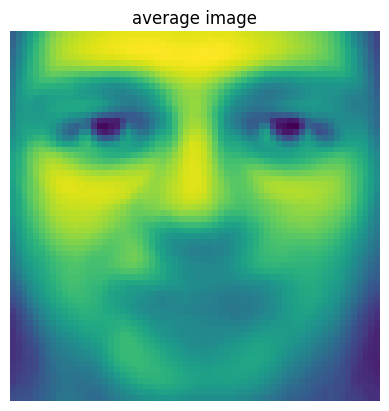

In [7]:
# we remember that each column contains an image reshaped, so the mean by columns (axis = 1)
X_mean = np.mean(X, axis=1)

plt.imshow(np.reshape(X_mean, (64,64)))
plt.title("average image")
plt.axis('off')

3. Perform SVD by first setting the attribute full_matrices = True and then full_matrices = False. Comment the results.

In [8]:
U_econ, s, Vt_econ = np.linalg.svd(X, full_matrices=False)
U_full, s_full, Vt_full = np.linalg.svd(X, full_matrices=True)

print("U_econ", U_econ.shape)
print("U_full", U_full.shape)

print("s_econ", s.shape)
print("s_full", s_full.shape)

print("Vt_econ", Vt_econ.shape)
print("Vt_full", Vt_full.shape)


U_econ (4096, 400)
U_full (4096, 4096)
s_econ (400,)
s_full (400,)
Vt_econ (400, 400)
Vt_full (400, 400)


In [9]:
%timeit np.linalg.svd(X, full_matrices=False)


416 ms ± 34.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit np.linalg.svd(X, full_matrices=True)

2.59 s ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The economic SVD (full_matrices=False) is significantly faster than the full SVD (full_matrices=True). Specifically, the economic SVD took about 284 milliseconds, while the full SVD took approximately 1,89 seconds.
In the economic SVD, U_econ has dimensions (4096, 400), which is much smaller compared to U_full with dimensions (4096, 4096).
This reduction in size is because the economic SVD only computes the leading singular vectors, omitting the extra orthonormal vectors that are computed in the full SVD.
The economic SVD is much faster and uses less memory, while the full SVD providing a complete basis is slower and more memory intensive.
The reason why s_econ and s_full both have the same shape (400,) lies in the nature of the singular values produced by SVD, regardless of whether full_matrices is set to True or False. They are the same in both SVD, They represent the diagolan elements of SIGMA in the SVD, but in case of the full shape the matrix SIGMA will has dimensions (4096, 400) but only the first 400 will be different from zero

4. Plot the trend of the singular values and the fraction of "explained variance".


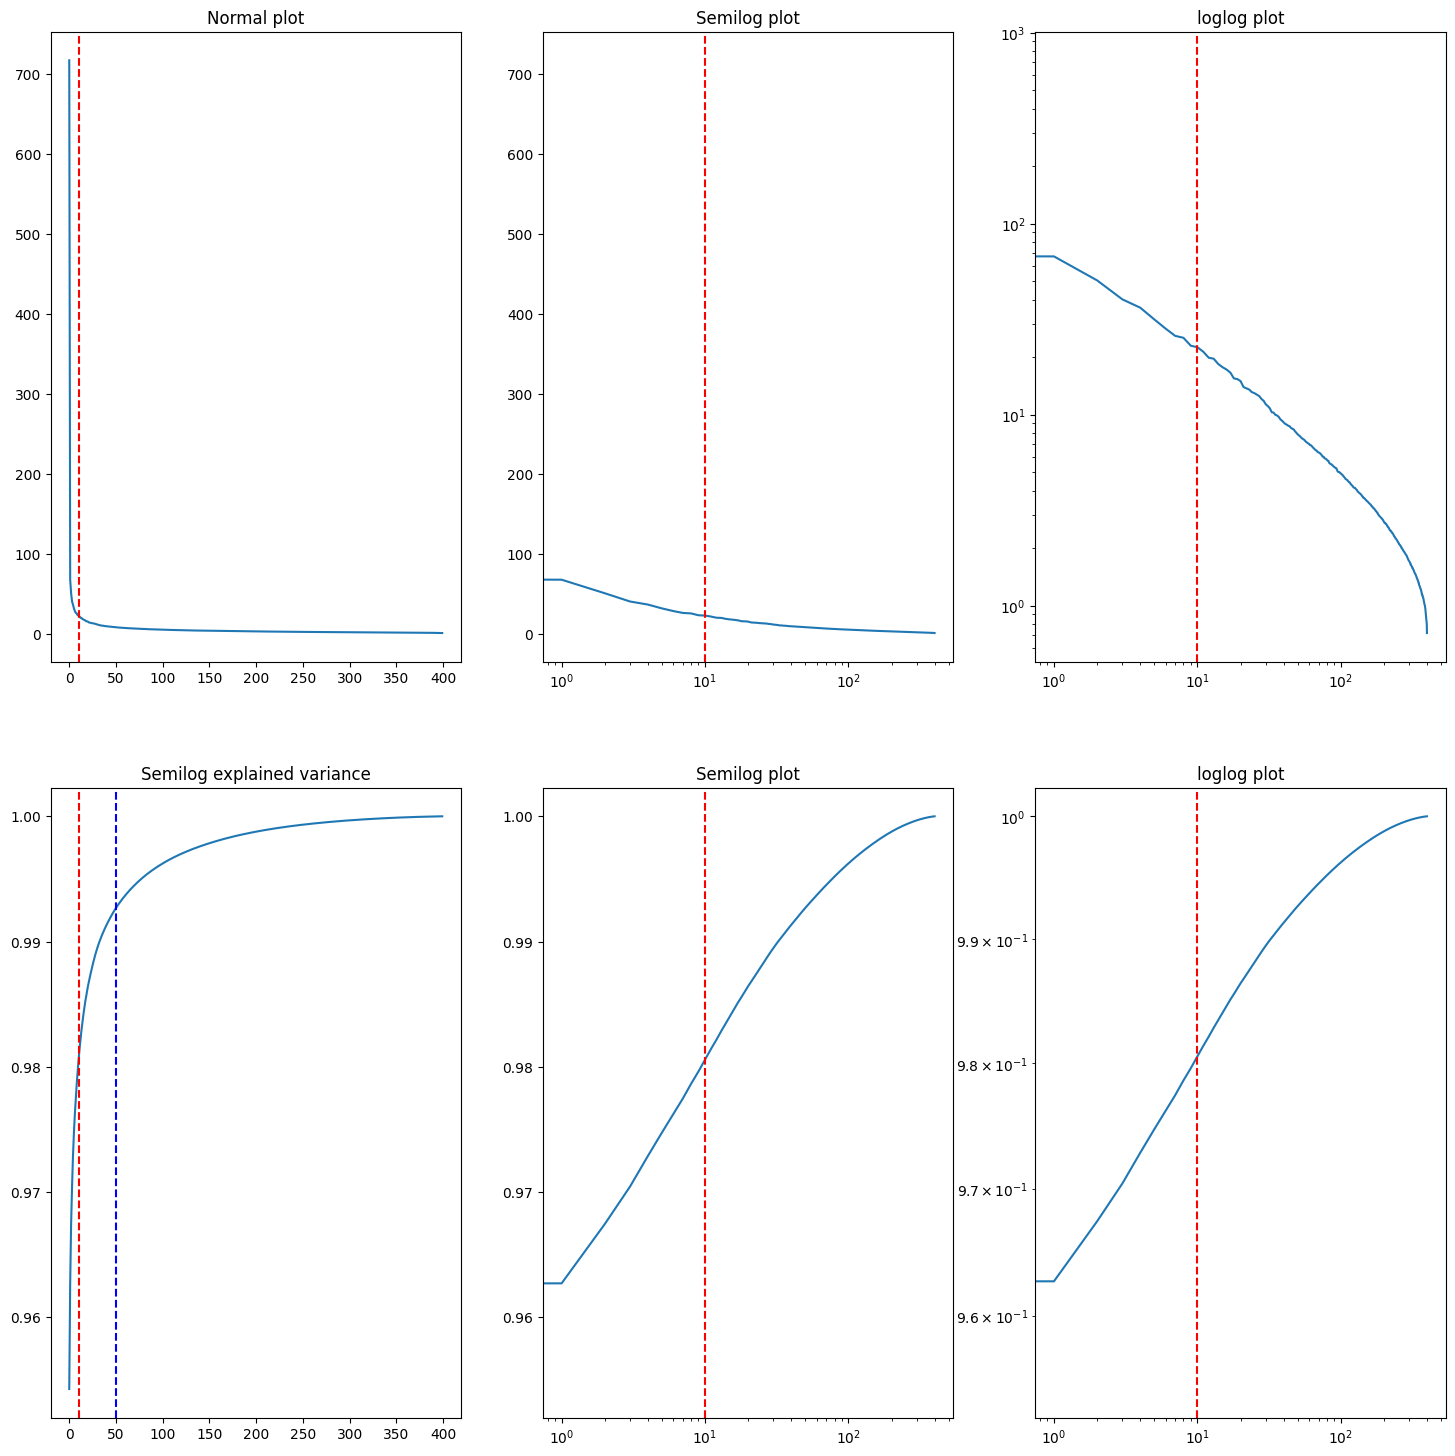

In [11]:
fig, axs = plt.subplots(2,3, figsize=(18,18))
axs = axs.flatten()

axs[0].plot(s)
axs[0].set_title("Normal plot")
axs[0].axvline(x=10, color='r', linestyle='--') # it seems 10 is the knee


axs[1].semilogx(s)
axs[1].set_title("Semilog plot")
axs[1].axvline(x=10, color='r', linestyle='--') # it seems 10 is the knee

axs[2].loglog(s)
axs[2].set_title("loglog plot")
axs[2].axvline(x=10, color='r', linestyle='--') # it seems 10 is the knee

axs[3].plot(np.cumsum(s**2)/np.sum(s**2))
axs[3].set_title("Semilog explained variance")
axs[3].axvline(x=10, color='r', linestyle='--') # 98%
axs[3].axvline(x=50, color='b', linestyle='--') # more than 99%

axs[4].semilogx(np.cumsum(s**2)/np.sum(s**2))
axs[4].set_title("Semilog plot")
axs[4].axvline(x=10, color='r', linestyle='--') # it seems 10 is the knee


axs[5].loglog(np.cumsum(s**2)/np.sum(s**2))
axs[5].set_title("loglog plot")
axs[5].axvline(x=10, color='r', linestyle='--') # it seems 10 is the knee



5. Implement a function computing the randomized SVD of rank k for a generic matrix.


In [12]:
def rsvd(A,k):
    m,n = A.shape
    omega = np.random.randn(n,k)
    Y = A @ omega
    Q,R = np.linalg.qr(Y)
    B = Q.transpose() @ A
    Ub, s, VT = np.linalg.svd(B, full_matrices= False)
    U = Q @ Ub
    return U, s, VT

6. Set k = 1, 5, 10, 50, 100 and plot the approximated singular values together with the exact ones.


0
1
2
3
4


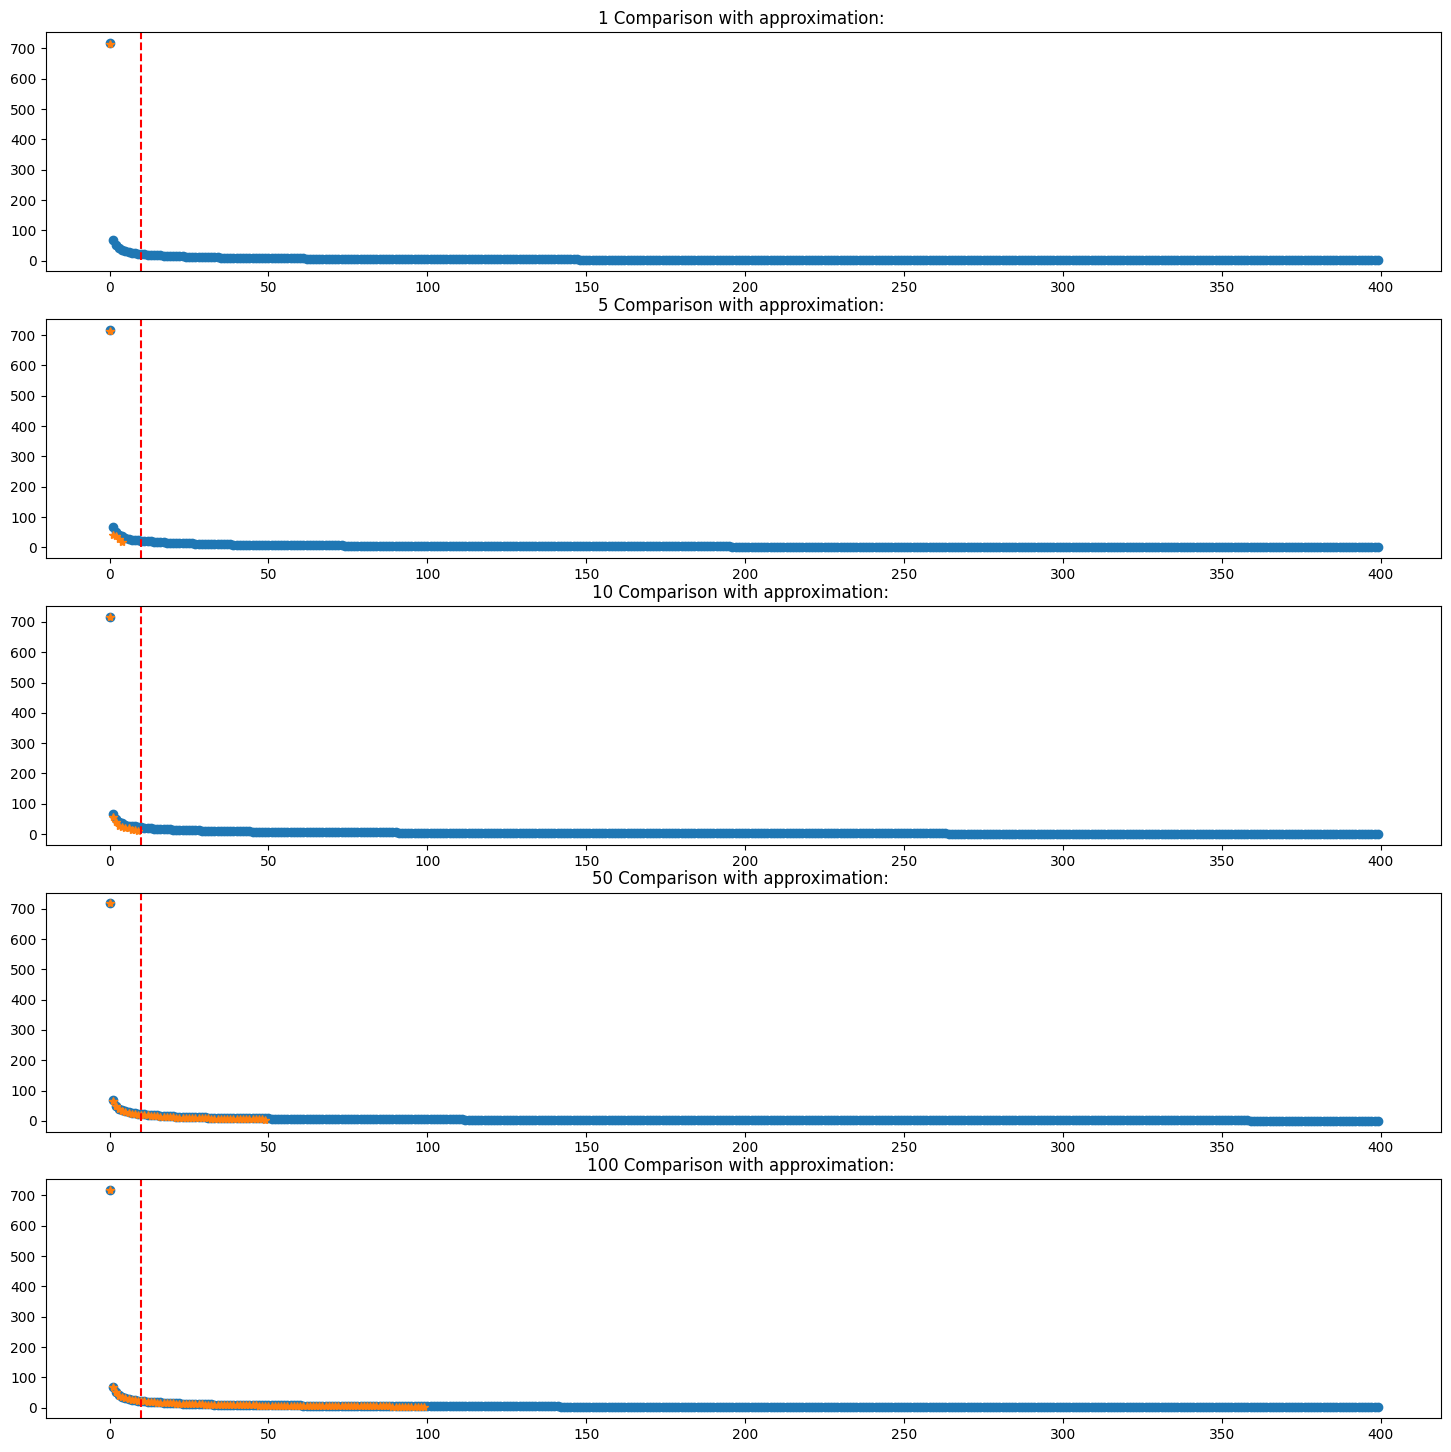

In [13]:
k = [1, 5, 10, 50, 100]

fig, axs = plt.subplots(5,1, figsize=(18,18))
axs = axs.flatten()

for i in range(len(k)):
    U,s_r,VT = rsvd(X,k[i])
    print(i)
    axs[i].plot(s, 'o')
    axs[i].plot(s_r, '*')
    axs[i].set_title("%d Comparison with approximation: " %k[i])
    axs[i].axvline(x=10, color='r', linestyle='--') # it seems 10 is the knee

7. Use PCA to perform dimensionality reduction on the dataset of images for rank k = 1, 5, 10, 50, 100 by means of exact SVD. Compute the reconstruction error and plot it as a function of k. Comment the results.

In [14]:
X_mean = np.mean(X, axis=1)
U, s, Vt = np.linalg.svd(X - X_mean[:, None], full_matrices=False)

The column vectors of U have the same dimensions of X, so they are the eigenfaces of the original faces
You can plot them and see what happens, they are the first two eigenfaces.
Every image of a person face is a linear combination of these eigenfaces, so we can take a new image and this face could be of a person that is not included in the initial face library: I project this face in my eigenfaces space Ur.T @ X where X is new image (tall skinny vector) 


(-0.5, 63.5, 63.5, -0.5)

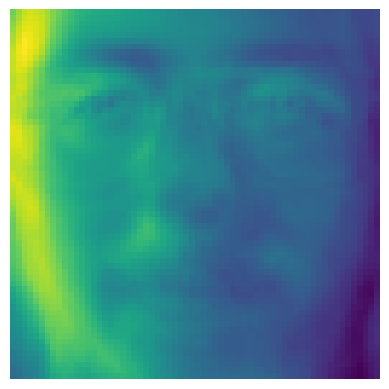

In [15]:
plt.imshow(np.reshape(U[:,1], (64,64)))
plt.axis('off')

In [16]:
def reconstruction_error(X,Xi):
    return np.linalg.norm(X - Xi)/np.linalg.norm(X)

In [17]:
history_error_list = []
U_svd, s_svd, VT_svd = np.linalg.svd(X, full_matrices=False)


print(s_svd[:2-1])

for i in k:
    X_svd = U_svd[:,:(i-1)] @ np.diag(s_svd[:(i-1)]) @ VT_svd[:(i-1), :]
    U_k = U_svd[:, :(i-1)]
    X_projected = U_k.T @ (X - X_mean)
    X_reconstructed = (U_k @ X_projected) + X_mean
    rec_error = reconstruction_error(X, X_reconstructed)
    print("%f reconstruction error" % rec_error)
    history_error_list.append(rec_error)

plt.plot(k, history_error_list, '-o')   
plt.xlabel("k")
plt.ylabel("reconstruction error")
plt.show()

[717.22144]


ValueError: operands could not be broadcast together with shapes (4096,400) (4096,) 

8. Visualize the first 30 principal axes.

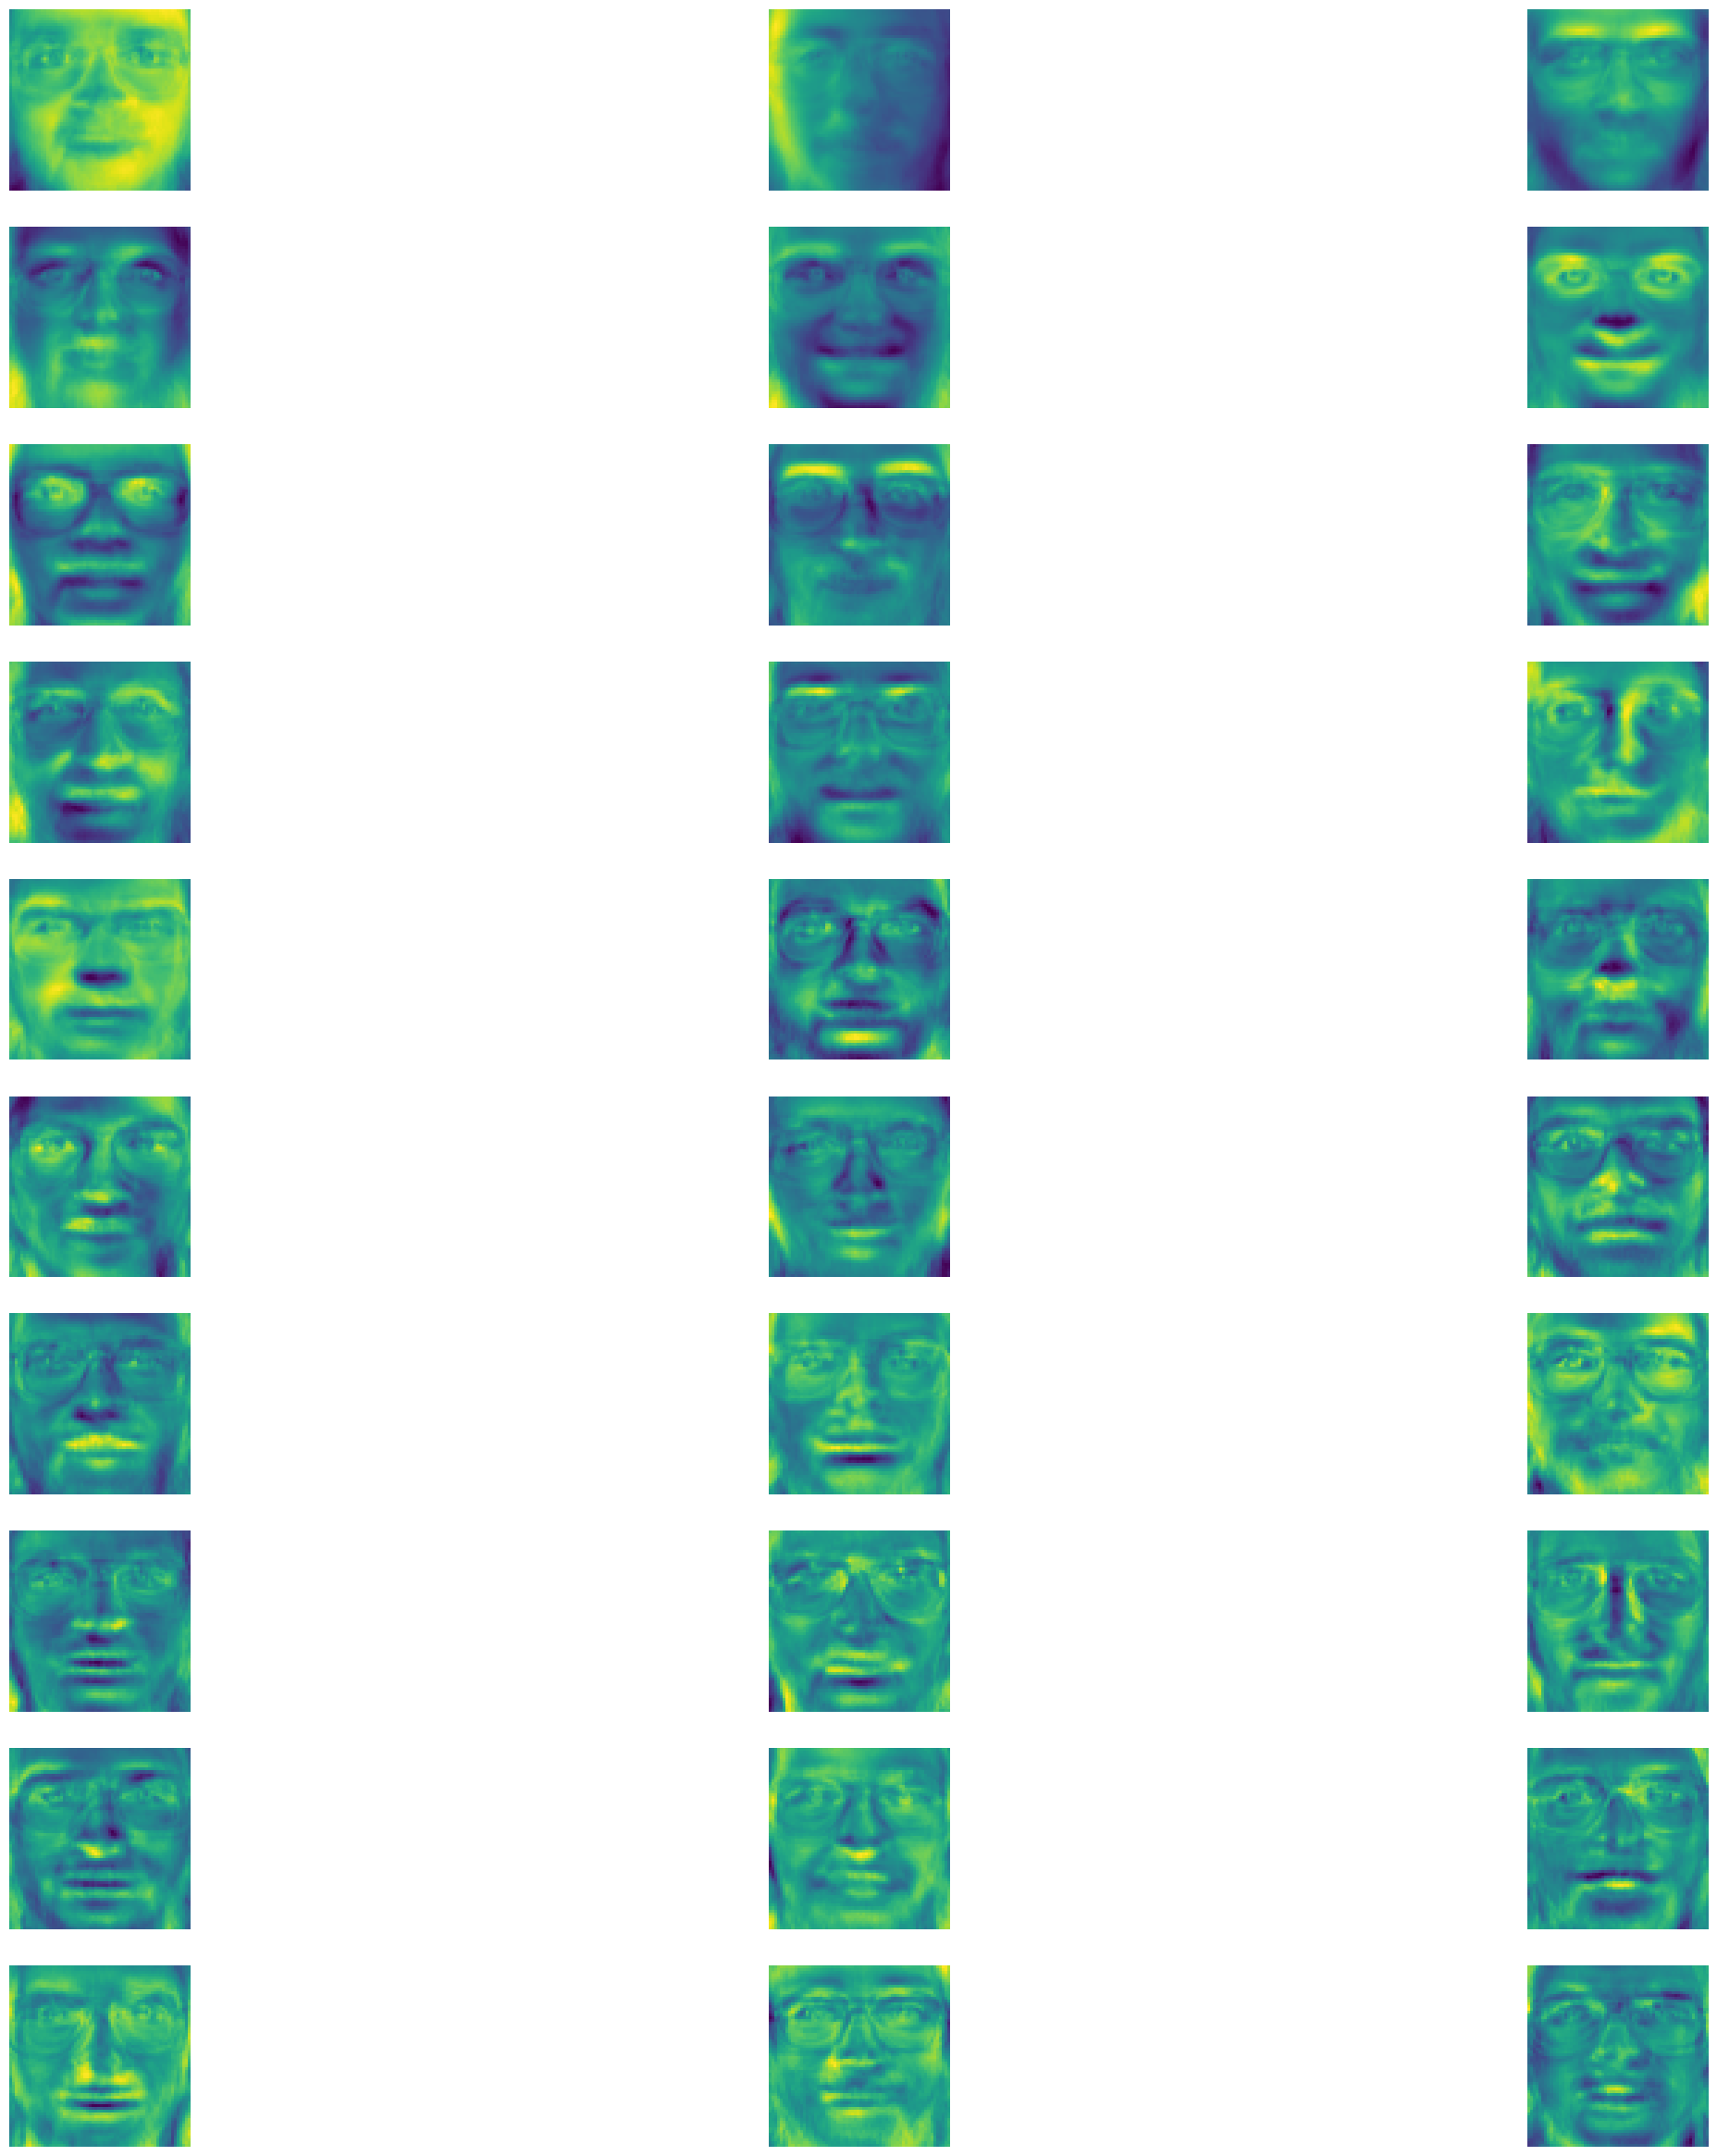

In [ ]:
fig, axs = plt.subplots(10,3, figsize=(30,30))
axs = axs.flatten()

for i in range(30):

    axs[i].imshow(np.reshape(U[:,i], (64,64)))
    axs[i].axis('off')

9. Compute the first two principal components related to the subset of images corresponding to labels = 0, 39.


In [ ]:
labels.shape

(400,)

In [ ]:
filtered_indices = []
for i in range(400):
    if labels[i] == 0:
        filtered_indices.append(i)
    elif labels[i] == 39:
        filtered_indices.append(i)


filtered_indices = (labels == 0) | (labels == 39)
X_filtered = X[:, filtered_indices]



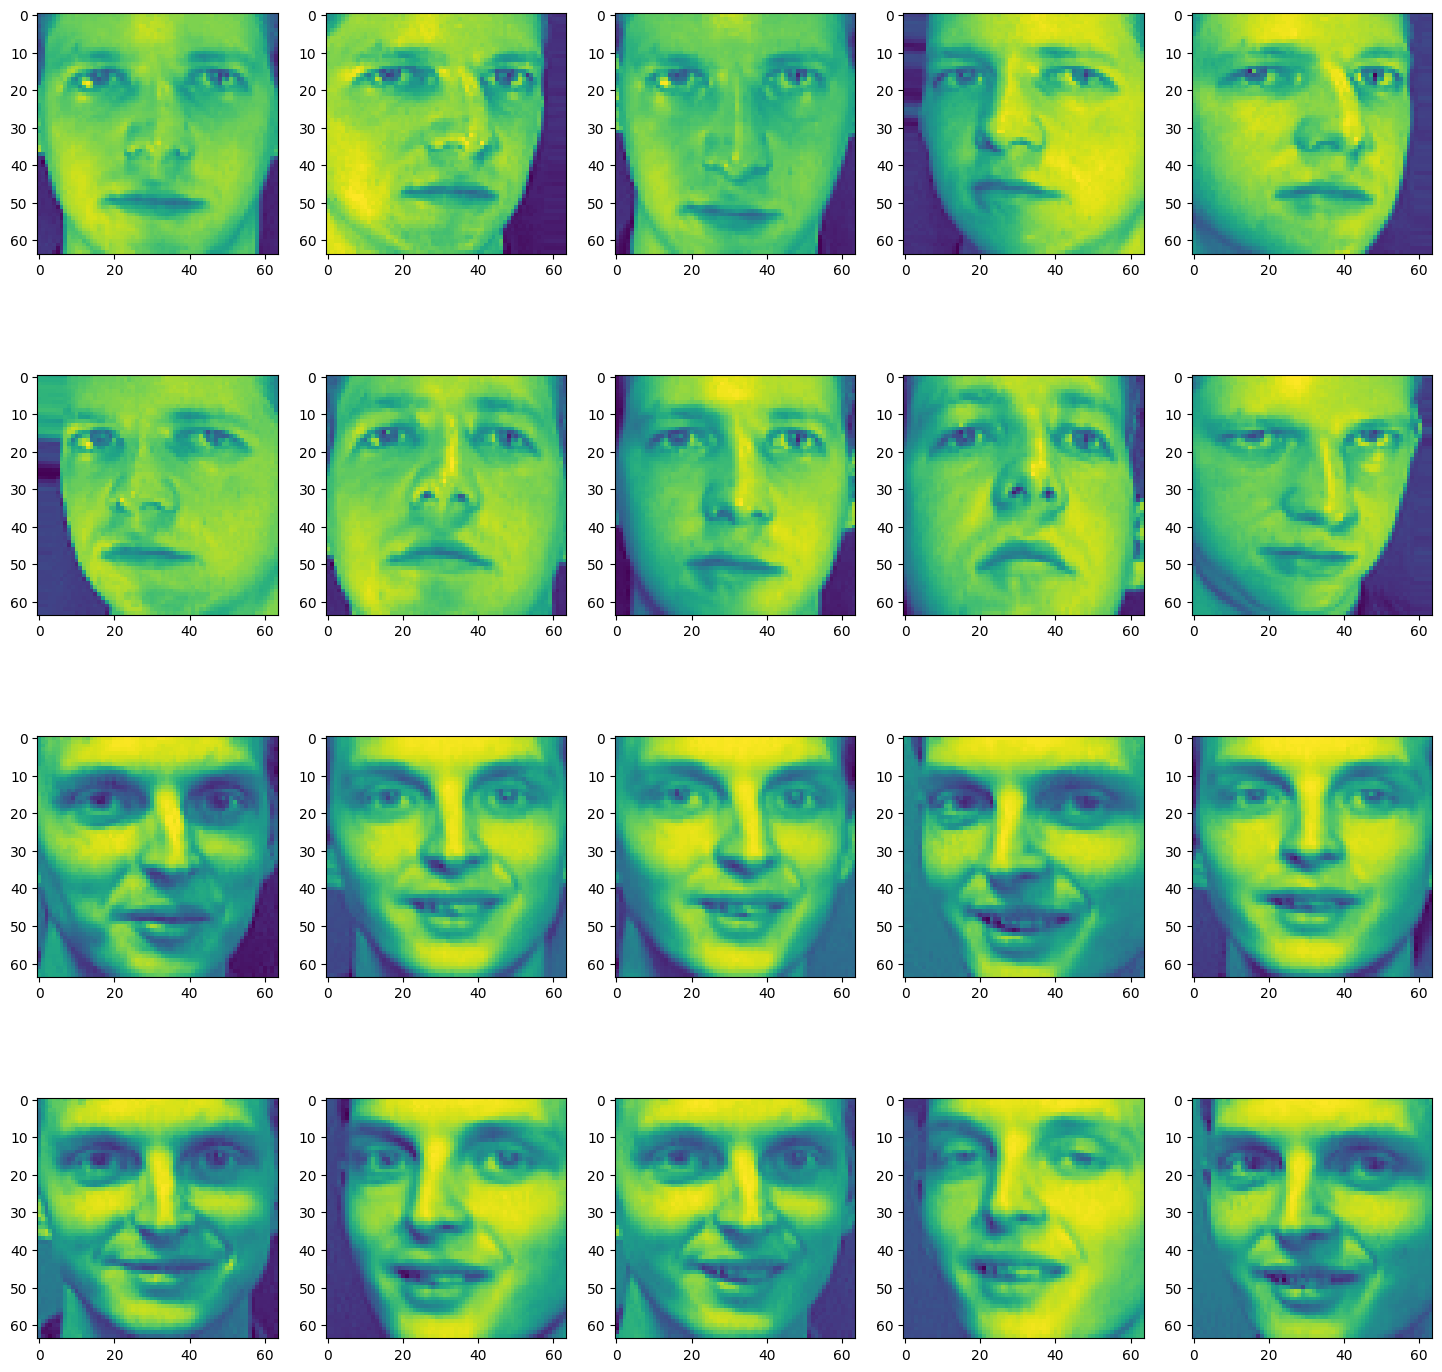

In [ ]:
fig, axs = plt.subplots(4,5, figsize=(18,18))
axs = axs.flatten()

#just look to the images of the filtered dataset

for i in range(20):
    axs[i].imshow(np.reshape(X_filtered[:,i], (64,64)))

In [ ]:
X_filtered_mean = np.mean(X_filtered, axis=1)
U, s, VT = np.linalg.svd(X_filtered - X_filtered_mean[:,None], full_matrices = False)
print(U.shape)
print(VT.shape)
print((X_filtered - X_filtered_mean[:,None]).shape)

(4096, 20)
(20, 20)
(4096, 20)


Compute the principal components of the data:

$\Phi = U^T \overline{X}$

In [ ]:
Phi = np.matmul(U.transpose(), X_filtered - X_filtered_mean[:, None])
Phi.shape

PC1 = Phi[0,:]
PC2 = Phi[1,:]

(20, 20)


10. Create a scatterplot for the first 2 principal components of the subset of images grouped by label. Comment what you see.


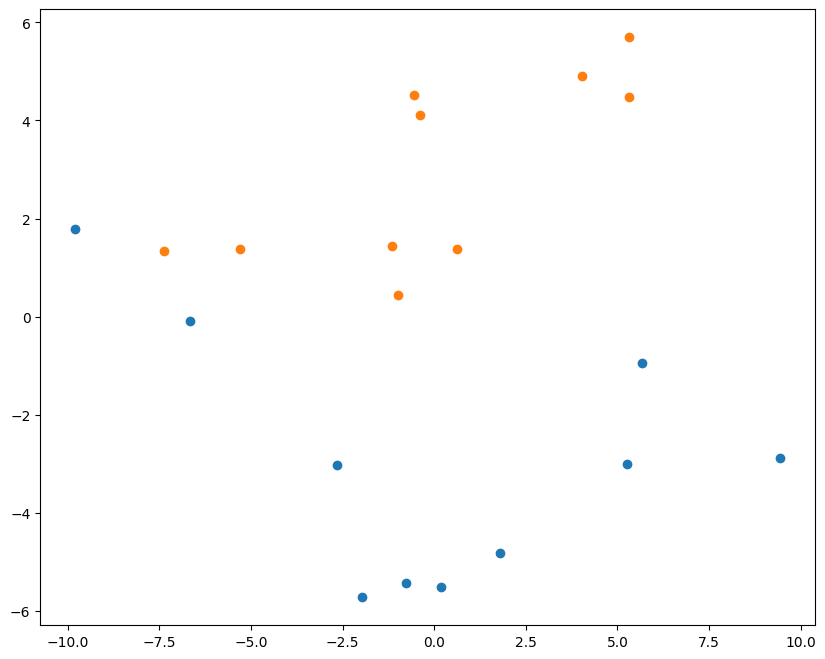

In [ ]:
labels_filtered = labels[filtered_indices]

# Create a scatter plot for the first 2 principal components with color coding for labels
fig, ax = plt.subplots(figsize=(10, 8))

for label in [0, 39]:
    ax.scatter(Phi[0, labels_filtered == label], Phi[1, labels_filtered == label], label=f'Label {label}')

The fact that the two clusters are distinct and have a visible gap between them in the scatter plot of the first two principal components indicates that the faces labeled 0 and 39 are indeed different and separable.
This implies that the principal components have effectively captured the underlying differences between these two sets of faces.